In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/us-federal-government-real-estate-pbs/US Federal Government Real Estate (PBS).csv',
                ).drop(columns=['Historical Type'])
df.columns = [name.strip() for name in df.columns]
df.head()

,Location Code,Region Code,Bldg Address1,Bldg City,Bldg County,Bldg State,Bldg Zip,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Construction Date,Historical Status,ABA Accessibility Flag
0,CT0013,1,135 HIGH ST,HARTFORD,HARTFORD,CT,61031125,ACTIVE,BUILDING,93394,28,OWNED,1-Jan-33,National Register Listed,Will Conform
1,CT0024,1,141 CHURCH ST,NEW HAVEN,NEW HAVEN,CT,65102001,ACTIVE,BUILDING,67174,0,OWNED,1-Jan-19,National Register Listed,Will Conform
2,CT0047,1,135 GRAND ST,WATERBURY,NEW HAVEN,CT,67029998,ACTIVE,BUILDING,269,0,LEASED,1-Jan-33,National Register Listed,Will Conform
3,CT0053,1,450 MAIN ST,HARTFORD,HARTFORD,CT,61031804,ACTIVE,BUILDING,197999,105,OWNED,1-Jan-63,,Will Conform
4,CT0059,1,915 LAFAYETTE BLVD,BRIDGEPORT,FAIRFIELD,CT,66044706,ACTIVE,BUILDING,85551,131,OWNED,1-Jan-67,,Will Conform


In [2]:
df.info(); df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8770 entries, 0 to 8769
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Location Code           8770 non-null   object
 1   Region Code             8770 non-null   int64 
 2   Bldg Address1           8770 non-null   object
 3   Bldg City               8770 non-null   object
 4   Bldg County             8770 non-null   object
 5   Bldg State              8770 non-null   object
 6   Bldg Zip                8770 non-null   int64 
 7   Bldg Status             8770 non-null   object
 8   Property Type           8770 non-null   object
 9   Bldg ANSI Usable        8770 non-null   int64 
 10  Total Parking Spaces    8770 non-null   int64 
 11  Owned/Leased            8770 non-null   object
 12  Construction Date       8770 non-null   object
 13  Historical Status       8770 non-null   object
 14  ABA Accessibility Flag  8770 non-null   object
dtypes: i

Location Code             8770
Region Code                 11
Bldg Address1             7702
Bldg City                 1934
Bldg County                933
Bldg State                  56
Bldg Zip                  7481
Bldg Status                  3
Property Type                2
Bldg ANSI Usable          6787
Total Parking Spaces       503
Owned/Leased                 2
Construction Date         1351
Historical Status            6
ABA Accessibility Flag       3
dtype: int64

In [3]:
from plotly.express import bar
columns = ['Bldg State', 'Bldg Status']
bar(data_frame=df[columns].groupby(by=columns).size().to_frame().reset_index().sort_values(ascending=False, by=0), x=columns[0],
    color=columns[1], y=0)

Not exactly a population map, is it? That's a little surprising.

In [4]:
columns = ['Bldg State', 'Region Code']
bar(data_frame=df[columns].groupby(by=columns).size().to_frame().reset_index().sort_values(ascending=False, by=0), x=columns[0],
    color=columns[1], y=0)

Region codes cross state lines but only a little.

In [5]:
columns = ['Bldg State', 'ABA Accessibility Flag']
bar(data_frame=df[columns].groupby(by=columns).size().to_frame().reset_index().sort_values(ascending=False, by=0), x=columns[0],
    color=columns[1], y=0)

In [6]:
for column in ['Region Code',  'Bldg Status', 'Property Type', 'Owned/Leased', 'Historical Status', 'ABA Accessibility Flag']:
    bar(data_frame=df[column].value_counts().to_frame().reset_index(), x=column, y='count').show()

In [7]:
from plotly.express import histogram
for column in ['Bldg Zip', 'Bldg ANSI Usable', 'Total Parking Spaces']:
    log_y = column not in {'Bldg Zip'}
    histogram(data_frame=df, x=column, log_y=log_y).show()

(-0.5, 1199.5, 1199.5, -0.5)

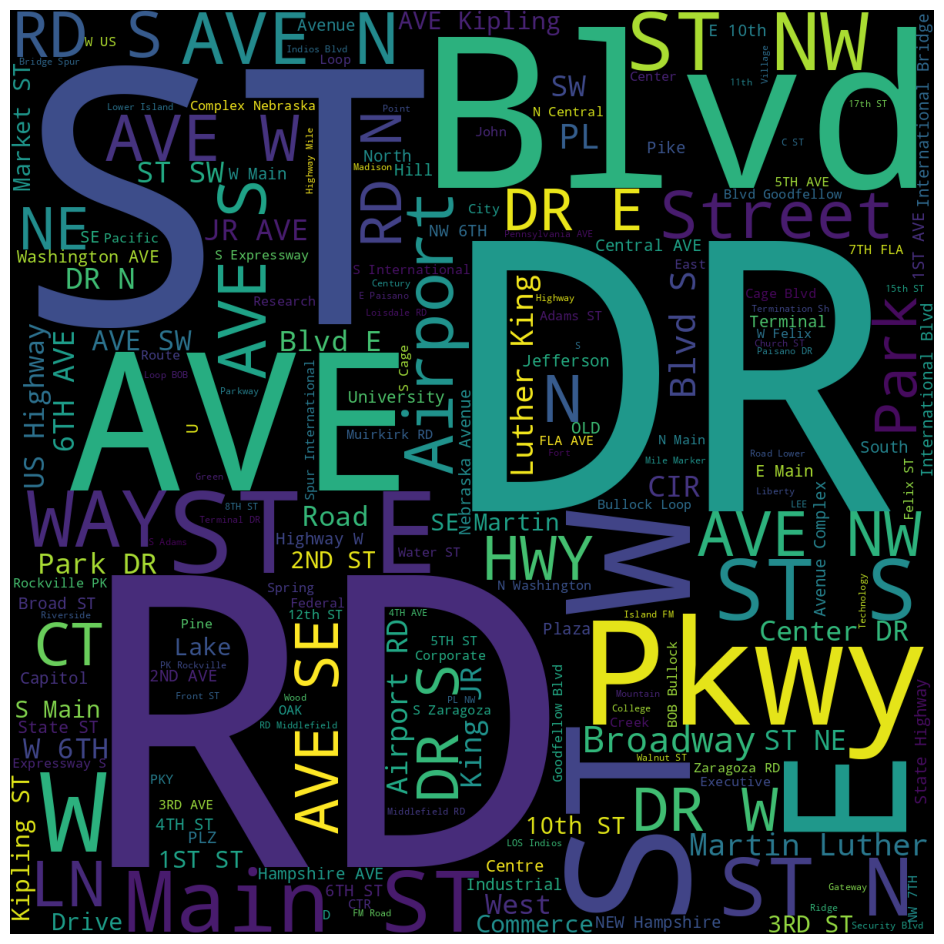

In [8]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

def fix(arg: str) -> str:
    if len(arg) < 4:
        return arg
    return arg.capitalize()

subplots(figsize=(12, 12))
text = ' '.join(df['Bldg Address1'].values)
text = ' '.join(fix(item) for item in text.split())
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

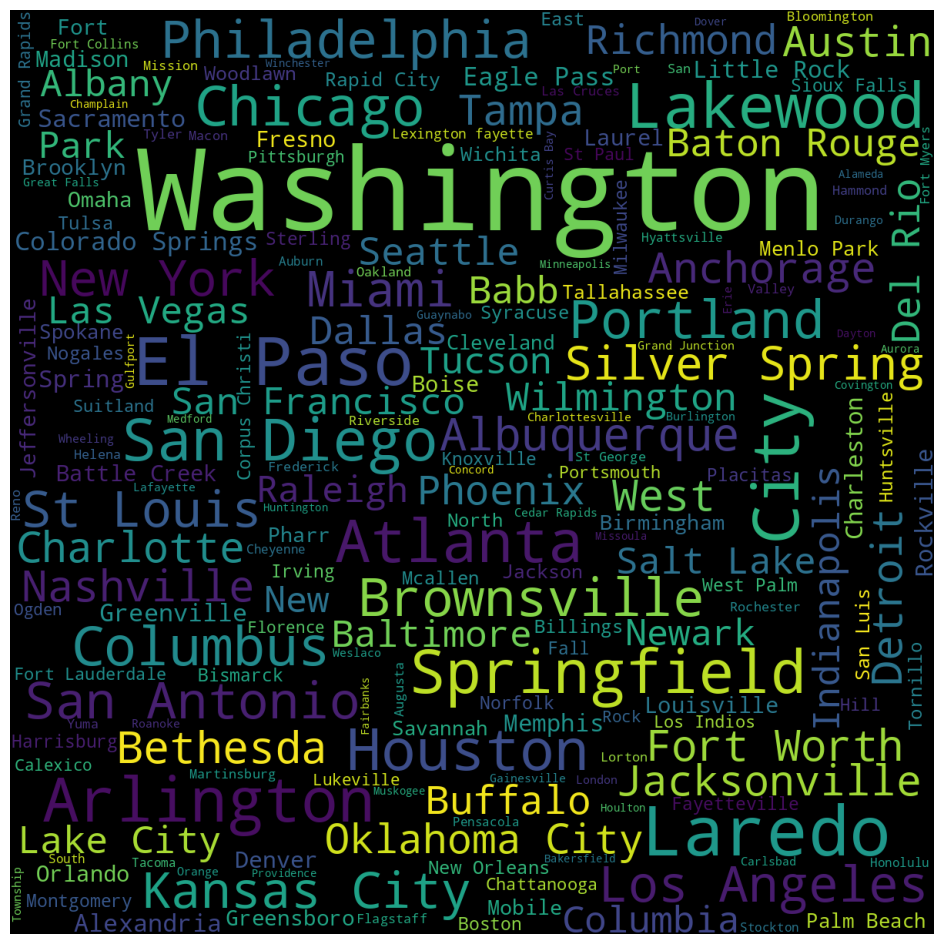

In [9]:
subplots(figsize=(12, 12))
text = ' '.join(item.capitalize() for item in ' '.join(df.sample(frac=1)['Bldg City'].values).split())
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text, ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

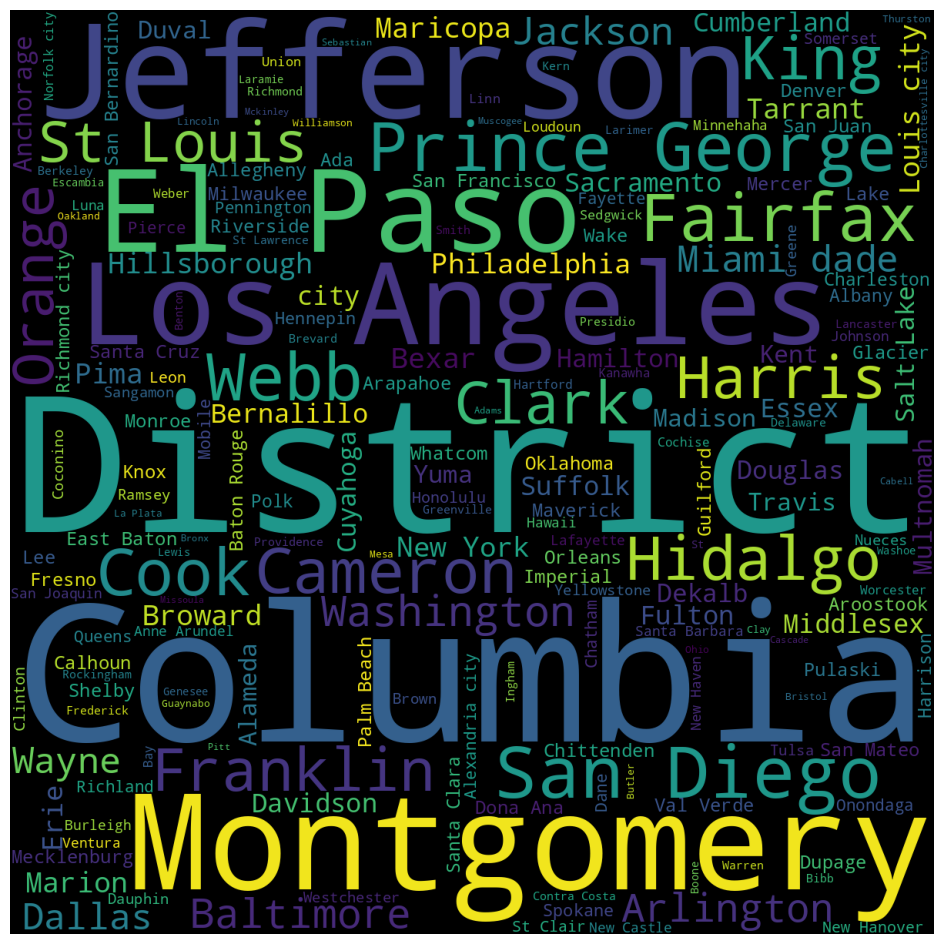

In [10]:
subplots(figsize=(12, 12))
text = ' '.join(item.capitalize() for item in ' '.join(df.sample(frac=1)['Bldg County'].values).split())
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text, ))
axis('off')

It is not particularly surprising that the government owns a lot of buildings in DC is it?